<a href="https://colab.research.google.com/github/AJITHKANNAN/Deep-Learning-Tutorials/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning in image classification

In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [5]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Make predictions using ready made model (without any training)


In [6]:

IMAGE_SHAPE = (224, 224) # becuase the model trained in the mobile V2 have 224 * 224 diimensions

# to add the RGB layer we use
IMAGE_SHAPE+(3,)



(224, 224, 3)

In [7]:
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

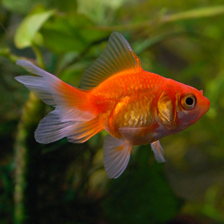

In [8]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [9]:

# Scaling
# color scale range = 0 - 255

gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

# adding a new axis to access multiple images as Inputs

In [10]:
gold_fish[np.newaxis, ...].shape


(1, 224, 224, 3)

In [11]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [13]:
xx_label = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

10484/10484 [==============================] - 0s 0us/step


In [14]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
image_labels[predicted_label_index]


'goldfish'

# Load flowers dataset


In [16]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 1s 0us/step


In [17]:
data_dir


'./datasets/flower_photos'

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('datasets/flower_photos/daisy/9054268881_19792c5203_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/169371301_d9b91a2a42.jpg'),
 PosixPath('datasets/flower_photos/daisy/3474942718_c418dae6f1.jpg'),
 PosixPath('datasets/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/433037739_6a030e5912.jpg')]

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/145862135_ab710de93c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2409069862_b128ee2a71.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3045046293_57f6d52065_m.jpg')]

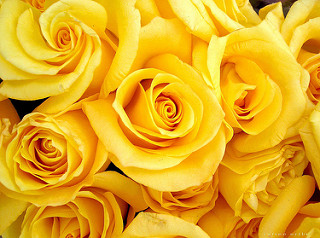

In [22]:
Image.open(str(roses[1]))


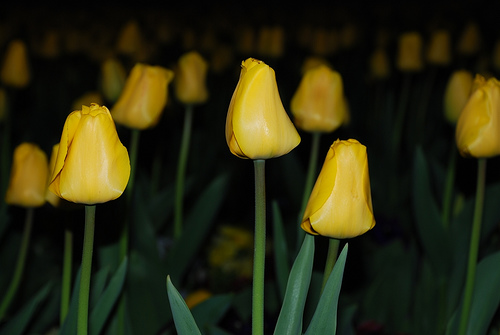

In [23]:

tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

# Read flowers images from disk into numpy array using opencv


In [24]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [25]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/145862135_ab710de93c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2409069862_b128ee2a71.jpg'),
 PosixPath('datasets/flower_photos/roses/2949945463_366bc63079_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3045046293_57f6d52065_m.jpg')]

In [26]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(224, 320, 3)

In [27]:
cv2.resize(img,(224,224)).shape


(224, 224, 3)

In [28]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():

    for image in images:

        img = cv2.imread(str(image))

        resized_img = cv2.resize(img, (224,224) )

        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [29]:
X = np.array(X)
y = np.array(y)

# Train test split


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Preprocessing: scale images


In [31]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

# Make prediction using pre-trained model on new flowers dataset


In [32]:

X[0].shape

(224, 224, 3)

In [33]:
IMAGE_SHAPE+(3,)


(224, 224, 3)

In [34]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

array([[[133, 141, 154],
        [140, 146, 155],
        [142, 150, 160],
        ...,
        [ 32,  46,  64],
        [ 32,  43,  63],
        [ 31,  46,  63]],

       [[127, 138, 151],
        [136, 146, 155],
        [140, 150, 160],
        ...,
        [ 31,  44,  66],
        [ 31,  46,  63],
        [ 29,  46,  62]],

       [[127, 137, 150],
        [137, 146, 157],
        [140, 150, 160],
        ...,
        [ 32,  46,  64],
        [ 32,  47,  62],
        [ 28,  46,  63]],

       ...,

       [[136, 141, 140],
        [134, 140, 139],
        [132, 137, 136],
        ...,
        [  0,  10,  33],
        [  0,  10,  25],
        [  2,  11,  35]],

       [[134, 138, 139],
        [133, 137, 138],
        [130, 134, 135],
        ...,
        [  0,  10,  32],
        [  0,   9,  26],
        [  2,   9,  32]],

       [[131, 135, 136],
        [132, 136, 137],
        [130, 134, 135],
        ...,
        [  1,  10,  30],
        [  0,   9,  27],
        [  0,   8,  31]]], dtype=uint8)
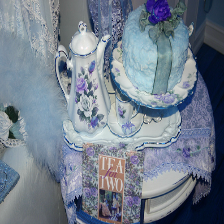

In [35]:
x2_resized

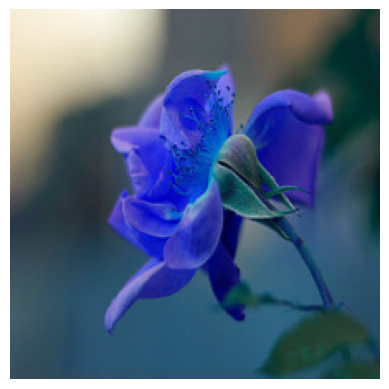

In [36]:
plt.axis('off')
plt.imshow(X[0])

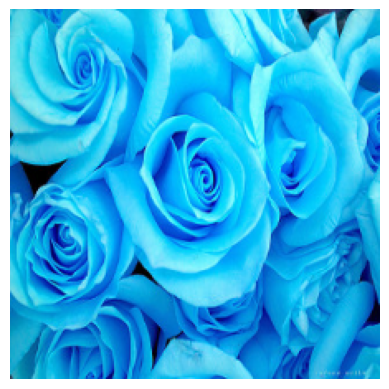

In [37]:
plt.axis('off')
plt.imshow(X[1])

In [38]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 1s/step


array([722, 795, 795])

In [39]:
image_labels[795]


'shower curtain'

In [40]:
image_labels[722]


'pillow'

# Now take pre-trained model and retrain it using flowers images


In [41]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
                                            feature_extractor_model, input_shape=(224, 224, 3), trainable=False)  # freeze

In [42]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test_scaled,y_test)
